In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from densenet import build, DataGenerator

Using TensorFlow backend.


In [2]:
testG = DataGenerator('openeds_split', 'test', 1)

In [3]:
model = build(400, 640, 4)
model.count_params()










Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



211462

In [6]:
model.load_weights('densenet_epoch_0004.hdf5')

In [7]:
im, lb = testG[0]
im.shape, lb.shape

((1, 640, 400, 3), (1, 640, 400, 4))

In [12]:
pred = model.predict(im)
out = np.array(pred[0, ...])
out = np.argmax(out, axis=-1)

In [13]:
np.unique(out, return_counts=True)

(array([0, 1, 2, 3]), array([213184,  32976,   1650,   8190]))

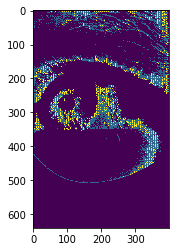

In [16]:
plt.imshow(out)

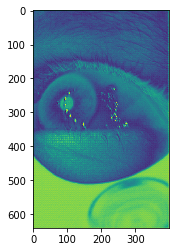

In [28]:
plt.imshow(pred[0, ..., 0])